In [1]:
import pandas as pd 
import numpy as np 
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.rcParams["patch.force_edgecolor"] = True

%matplotlib inline

In [2]:
#importing the Iris dataset with pandas
dataset = pd.read_csv('C:/Fall2018/ML/datasets/forestfires.csv')

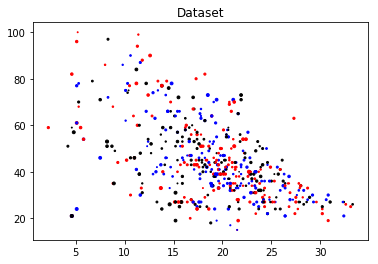

In [7]:
#Temp,RH,Wind
x = dataset.iloc[:, [8,9,10]].values
plt.scatter(dataset.iloc[:,8],dataset.iloc[:,9],dataset.iloc[:,10],color=['black','red','blue'])
plt.title('Dataset')
plt.show()

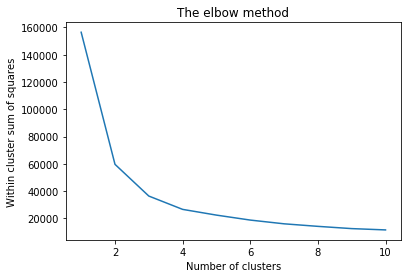

In [4]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares') #within cluster sum of squares
plt.show()


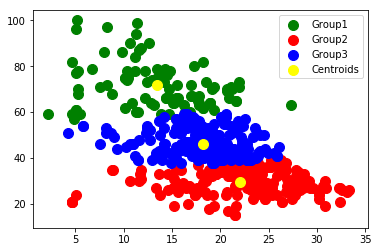

In [5]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Group1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Group2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Group3')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()